# Proyecto Evaluación del impacto de un nuevo sistema de recomendaciones: Análisis de Prueba A/B 

# Tabla de contenido
1. [Introducción al Proyecto](#Introduccción-al-Proyecto)
2. [Objetivos específicos](#Objetivos-específicos)
3. [Etapas de análisis del proyecto](#Etapas-de-análisis-del-proyecto)
4. [Preparación de datos](#Preparación-de-datos)
5. [Análisis Exploratorio de Datos (EDA)](#Análisis-Exploratorio-de-Datos-(EDA))
6. [Análisis de resultados de la prueba A/B](#Análisis-de-resultados-de-la-prueba-A/B)
7. [Conclusiones y recomendaciones](#Conclusiones-y-recomendaciones)

# Introducción al Proyecto 
Este proyecto tiene como objetivo analizar los resultados de una prueba A/B implementada por una tienda en línea internacional para evaluar un sistema de recomendaciones mejorado. El experimento, denominado recommender_system_test, fue diseñado para medir el impacto de un nuevo embudo de pago en la conversión de los usuarios a través de tres etapas clave del embudo de ventas: vistas de página de producto, adición de productos al carrito y compras finales. La audiencia objetivo abarcó el 15% de los nuevos usuarios en la región de la UE durante el período de prueba, desde el 7 de diciembre de 2020 hasta el 1 de enero de 2021.

El propósito principal es determinar si el nuevo sistema logró incrementar la conversión en al menos un 10% en cada etapa del embudo, en comparación con el grupo de control. Este análisis implica evaluar la eficacia del sistema de recomendaciones propuesto mediante una combinación de análisis exploratorio de datos y pruebas estadísticas.

# Objetivos específicos
**1.Explorar y limpiar los datos del experimento**
Examinar los datos proporcionados para identificar valores faltantes, duplicados y anomalías. Asegurarse de que los tipos de datos sean adecuados para el análisis y realizar las transformaciones necesarias.

**2.Analizar las métricas de conversión en el embudo de ventas**
Evaluar el comportamiento de los usuarios en las distintas etapas del embudo (product_page → product_card → purchase) y determinar si hay diferencias significativas entre los grupos de prueba y control en términos de número de eventos, conversión por etapa y actividad diaria.

**3.Evaluar los resultados estadísticos de la prueba A/B**
Realizar una prueba Z para comparar las proporciones de conversión entre los grupos de prueba y control. Determinar si las diferencias observadas son estadísticamente significativas y cumplen con los objetivos establecidos de la prueba.

# Etapas de análisis del proyecto
**-Preparación de datos**

Cargar los datos de las tablas proporcionadas.
Identificar y tratar valores ausentes, duplicados o inconsistentes.
Verificar la existencia de usuarios en múltiples grupos de prueba.
Asegurarse de que las columnas relevantes tengan el formato correcto (fechas, numéricos, etc.).

**-Análisis exploratorio de datos (EDA)**

Evaluar la distribución de eventos en el tiempo y por usuario.


**-Análisis de resultados de la prueba A/B**

Calcular las tasas de conversión por etapa para ambos grupos.
Realizar una prueba Z para determinar si las diferencias entre los grupos son estadísticamente significativas.
Comprobar si se alcanzaron los incrementos esperados del 10% en cada etapa del embudo.

**-Conclusiones y recomendaciones**

Proporcionar recomendaciones basadas en los resultados de la prueba para mejorar el sistema de recomendaciones y la experiencia del usuario.

# Preparación de datos

**Inicialización**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import numpy as np
from scipy.stats import norm

In [2]:
url = "https://file.notion.so/f/f/662b586e-86b7-4f44-9740-1dc06c7a67a4/0fe62c32-aa77-49a5-8a8b-007bd5b2412e/ab_project_marketing_events_us_(1).csv?table=block&id=1146ed1e-fc93-8146-806d-ef3d6da82fb2&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1734405806668&signature=C7oclFEoxNhRXGYy-_wSq_KABClqhdp6kh6DZw2B8DA&downloadName=ab_project_marketing_events_us.csv"

In [3]:
file_name = "ab_project_marketing_events_us.csv"

In [4]:
try:
    response = requests.get(url)
    response.raise_for_status() 
    with open("ab_project_marketing_events_us.csv", "wb") as file:
        file.write(response.content)
    print(f"Archivo descargado exitosamente como: {"ab_project_marketing_events_us.csv"}")
except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo: {e}")

Error al descargar el archivo: 419 Client Error: Unknown for url: https://file.notion.so/f/f/662b586e-86b7-4f44-9740-1dc06c7a67a4/0fe62c32-aa77-49a5-8a8b-007bd5b2412e/ab_project_marketing_events_us_(1).csv?table=block&id=1146ed1e-fc93-8146-806d-ef3d6da82fb2&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1734405806668&signature=C7oclFEoxNhRXGYy-_wSq_KABClqhdp6kh6DZw2B8DA&downloadName=ab_project_marketing_events_us.csv


In [5]:
url = "https://file.notion.so/f/f/662b586e-86b7-4f44-9740-1dc06c7a67a4/6be71a24-aa02-41c6-8588-9f89ee459d65/final_ab_new_users_upd_us.csv?table=block&id=1146ed1e-fc93-81ba-97e0-cef88e5bb104&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1734408685636&signature=FacKKus7vdfcUOMjxIjdrnHBdxu3YDs-p9O-ENSLpqk&downloadName=final_ab_new_users_upd_us.csv"

In [6]:
file_name = "final_ab_new_users_upd_us.csv"

In [7]:
try:
    response = requests.get(url)
    response.raise_for_status() 
    with open("final_ab_new_users_upd_us.csv", "wb") as file:
        file.write(response.content)
    print(f"Archivo descargado exitosamente como: {"final_ab_new_users_upd_us.csv"}")
except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo: {e}")

Error al descargar el archivo: 419 Client Error: Unknown for url: https://file.notion.so/f/f/662b586e-86b7-4f44-9740-1dc06c7a67a4/6be71a24-aa02-41c6-8588-9f89ee459d65/final_ab_new_users_upd_us.csv?table=block&id=1146ed1e-fc93-81ba-97e0-cef88e5bb104&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1734408685636&signature=FacKKus7vdfcUOMjxIjdrnHBdxu3YDs-p9O-ENSLpqk&downloadName=final_ab_new_users_upd_us.csv


In [8]:
url = "https://file.notion.so/f/f/662b586e-86b7-4f44-9740-1dc06c7a67a4/bded79e7-4918-453d-9259-4fcac87163e3/final_ab_events_upd_us.csv?table=block&id=1146ed1e-fc93-8199-b4fd-f0c1da3c1b8e&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1734408849587&signature=-CSZGmr5rYXOZdu_qkoOm-3tAJSDINtZaI5ANEz7-No&downloadName=final_ab_events_upd_us.csv"

In [9]:
file_name = "final_ab_events_upd_us.csv"

In [10]:
try:
    response = requests.get(url)
    response.raise_for_status() 
    with open("final_ab_events_upd_us.csv", "wb") as file:
        file.write(response.content)
    print(f"Archivo descargado exitosamente como: {"final_ab_events_upd_us.csv"}")
except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo: {e}")

Error al descargar el archivo: 419 Client Error: Unknown for url: https://file.notion.so/f/f/662b586e-86b7-4f44-9740-1dc06c7a67a4/bded79e7-4918-453d-9259-4fcac87163e3/final_ab_events_upd_us.csv?table=block&id=1146ed1e-fc93-8199-b4fd-f0c1da3c1b8e&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1734408849587&signature=-CSZGmr5rYXOZdu_qkoOm-3tAJSDINtZaI5ANEz7-No&downloadName=final_ab_events_upd_us.csv


In [11]:
url = "https://file.notion.so/f/f/662b586e-86b7-4f44-9740-1dc06c7a67a4/ec5c9f7b-86f7-4d00-89ed-e36b34f7be09/final_ab_participants_upd_us.csv?table=block&id=1146ed1e-fc93-8111-aa93-e46ca0da63a8&spaceId=662b586e-86b7-4f44-9740-1dc06c7a67a4&expirationTimestamp=1734409004285&signature=Ohp_DwIVycXFe50w3e5Q7F8B-PZhiSJP7Iti1pMbDzY&downloadName=final_ab_participants_upd_us.csv"

In [12]:
file_name = "final_ab_participants_upd_us.csv"

In [13]:
try:
    response = requests.get(url)
    response.raise_for_status() 
    with open("final_ab_participants_upd_us.csv", "wb") as file:
        file.write(response.content)
    print(f"Archivo descargado exitosamente como: {"final_ab_participants_upd_us.csv"}")
except requests.exceptions.RequestException as e:
    print(f"Error al descargar el archivo: {e}")

Archivo descargado exitosamente como: final_ab_participants_upd_us.csv


**Cargar los datos**

In [14]:
project_marketing_events = pd.read_csv('ab_project_marketing_events_us.csv')

In [15]:
new_users = pd.read_csv('final_ab_new_users_upd_us.csv')

In [16]:
events = pd.read_csv('final_ab_events_upd_us.csv')

In [17]:
participants = pd.read_csv('final_ab_participants_upd_us.csv')

**project_marketing_events**

In [18]:
project_marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [19]:
project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [20]:
project_marketing_events['start_dt'] = pd.to_datetime(project_marketing_events['start_dt'], format = '%Y-%m-%d')

In [21]:
project_marketing_events['finish_dt'] = pd.to_datetime(project_marketing_events['finish_dt'], format = '%Y-%m-%d')

In [22]:
project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 580.0+ bytes


In [23]:
project_marketing_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [24]:
project_marketing_events.duplicated().sum()

0

**new_users**

In [25]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [26]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [27]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format = '%Y-%m-%d')

In [28]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [29]:
new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [30]:
new_users.duplicated().sum()

0

**events**

In [31]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [32]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [33]:
events['event_dt'] = pd.to_datetime(events['event_dt'])

In [34]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [35]:
events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

-Análisis de los datos nulos en details

In [36]:
print(events[events['details'].isnull()]['event_name'].value_counts())

event_name
login           182465
product_page    120862
product_cart     60120
Name: count, dtype: int64


In [37]:
events['details'] = events['details'].fillna('Not Applicable')

In [38]:
events.isna().sum()

user_id       0
event_dt      0
event_name    0
details       0
dtype: int64

**Observaciones**

-Columna login: 182,465 nulos. Es razonable que este evento tenga valores nulos en details. No parece que este evento requiera información adicional específica en esa columna.                                                                                                                          
-Columna product_page: 120,862 nulos. Los usuarios visitan páginas de productos, pero la columna details probablemente no sea necesaria aquí. Es poco probable que esta métrica dependa de datos adicionales.                                                                                               
-Columna product_cart: 60,120 nulos. Aunque este evento podría beneficiarse de información adicional, como el ID del producto o detalles del carrito, parece que esta información no está disponible en este conjunto de datos.                                                                             
En los tres casos se rellenó con un marcador claro como "Not Applicable" para indicar que no hay datos relevantes para este evento.

events.duplicated().sum()

**participants**

In [39]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [40]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [41]:
participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [42]:
participants.duplicated().sum()

0

-Verificar usuarios que podrían haber entrado tanto en el grupo A como en el grupo B.Si un usuario participa tanto en el grupo de control (A) como en el grupo de prueba (B), sus resultados pueden no ser independientes. Esto puede sesgar las métricas de conversión, ya que el comportamiento de un usuario podría verse afectado por su exposición a ambas versiones.

In [43]:
participants.groupby(['user_id'])['group'].nunique().sort_values(ascending=False)

user_id
B06B45B7C3E5E721    2
E594B711ADD81DD8    2
A8C25A605F613665    2
3A6D88AB973BD99D    2
0ADFFFE9C0D60092    2
                   ..
570D3B2EFF6747A2    1
5710EDF8BA684005    1
57150D3838DE301A    1
571B20781EF5D222    1
FFF58BC33966EB51    1
Name: group, Length: 13638, dtype: int64

In [44]:
usuarios_ambos_grupos = participants.groupby(['user_id'])['group'].nunique().sort_values(ascending=False).reset_index().query('group>1')

In [45]:
usuarios_ambos_grupos['user_id']

0      B06B45B7C3E5E721
1      E594B711ADD81DD8
2      A8C25A605F613665
3      3A6D88AB973BD99D
4      0ADFFFE9C0D60092
             ...       
436    BAAEE6D68FB90D22
437    4409E20FCD07CD14
438    C1E43A9B1D675927
439    D9C92EC5F9478381
440    83E9CFC64D61108E
Name: user_id, Length: 441, dtype: object

In [46]:
participants_limpio = participants[~participants['user_id'].isin(usuarios_ambos_grupos['user_id'])]

In [47]:
participants_limpio['user_id'].nunique()

13197

In [48]:
participants = participants_limpio

# Análisis Exploratorio de Datos (EDA)

-Evaluar la distribución de eventos en el tiempo y por usuario

In [49]:
events_with_group = events.merge(participants[['user_id', 'group']], on='user_id', how='left')

In [50]:
print(events_with_group.head())

            user_id            event_dt event_name details group
0  E1BDDCE0DAFA2679 2020-12-07 20:22:03   purchase   99.99   NaN
1  7B6452F081F49504 2020-12-07 09:22:53   purchase    9.99   NaN
2  9CD9F34546DF254C 2020-12-07 12:59:29   purchase    4.99   NaN
3  96F27A054B191457 2020-12-07 04:02:40   purchase    4.99     B
4  1FD7660FDF94CA1F 2020-12-07 10:15:09   purchase    4.99   NaN


-Eventos diarios por grupo

In [51]:
events_with_group['event_date'] = events_with_group['event_dt'].dt.date

In [52]:
daily_events = events_with_group.groupby(['event_date', 'group']).size().reset_index(name='event_count')

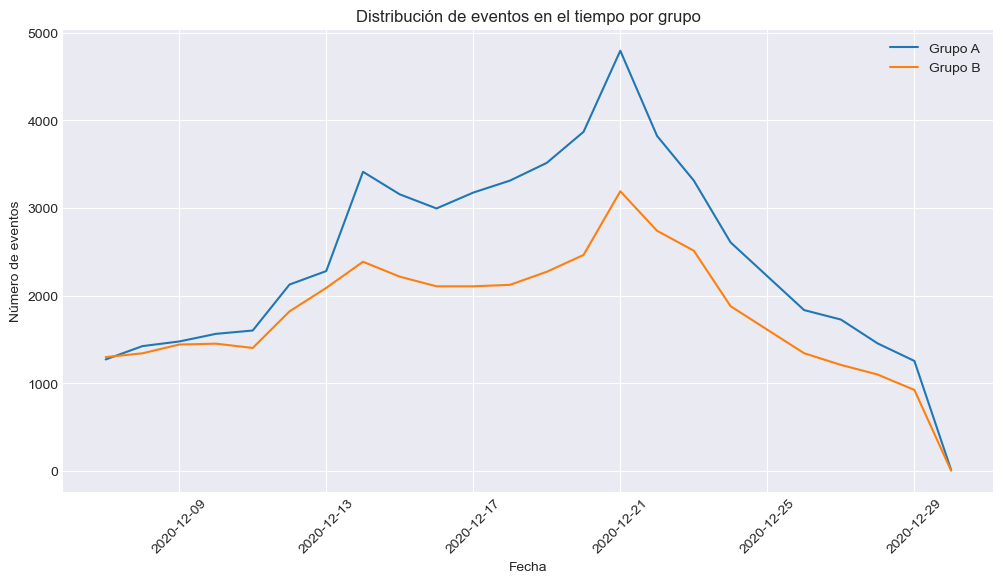

In [53]:
plt.figure(figsize=(12, 6))
for group in ['A', 'B']:
    subset = daily_events[daily_events['group'] == group]
    plt.plot(subset['event_date'], subset['event_count'], label=f'Grupo {group}')

plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Distribución de eventos en el tiempo por grupo')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Observaciones                                                                                                                                          
Grupo A: Presenta un crecimiento constante hasta alcanzar un pico alrededor del 2020-12-21, luego comienza a disminuir.Grupo B: También muestra un crecimiento inicial, pero su pico es menos pronunciado y ocurre unos días antes que en el Grupo A. Posteriormente, su descenso es más rápido.           Los eventos no están distribuidos uniformemente entre los grupos. Hay momentos en los que un grupo tiene significativamente más eventos que el otro, especialmente en los picos.La diferencia entre los grupos se acentúa a medida que se acerca el pico máximo. El pico alrededor del 2020-12-21 representa un evento o factor externo de gran relevancia para ambos grupos, y su estudio podría proporcionar insights valiosos sobre la naturaleza de estos eventos.Después de los picos, ambos grupos experimentan una disminución marcada en el número de eventos, lo que podría indicar una saturación o cambio en las condiciones que generaban los eventos.

-Eventos de cada tipo que ocurrieron en cada grupo

In [54]:
event_distribution = events_with_group.groupby(['event_name', 'group']).size().reset_index(name='event_count')

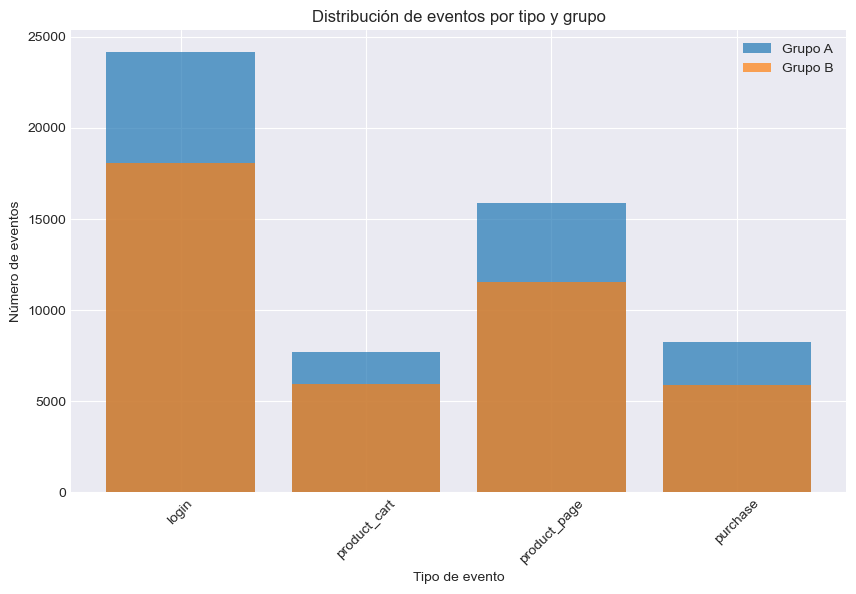

In [55]:
plt.figure(figsize=(10, 6))
for group in ['A', 'B']:
    subset = event_distribution[event_distribution['group'] == group]
    plt.bar(subset['event_name'], subset['event_count'], alpha=0.7, label=f'Grupo {group}')

plt.xlabel('Tipo de evento')
plt.ylabel('Número de eventos')
plt.title('Distribución de eventos por tipo y grupo')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Observaciones

Si bien ambos grupos presentan una distribución similar en los tipos de eventos (login, product_cart, product_page y purchase), la proporción de cada tipo de evento varía entre ellos. Ambos grupos muestran un patrón similar: el evento "login" es el más frecuente, seguido de "product_page", "product_cart" y finalmente "purchase". Esto sugiere un flujo de usuario común en ambos grupos, donde los usuarios inician sesión, navegan por productos y algunos eventualmente realizan una compra. Ambos grupos muestran un comportamiento similar en términos de los tipos de eventos y su orden de frecuencia. A pesar de las similitudes, existen diferencias en las proporciones de cada tipo de evento entre los grupos. Esto podría indicar variaciones en el engagement de los usuarios, la eficacia de las estrategias de marketing o incluso diferencias en las características demográficas de cada grupo.

-Eventos por usuario

In [56]:
events_per_user = events_with_group.groupby(['user_id', 'group']).size().reset_index(name='event_count')

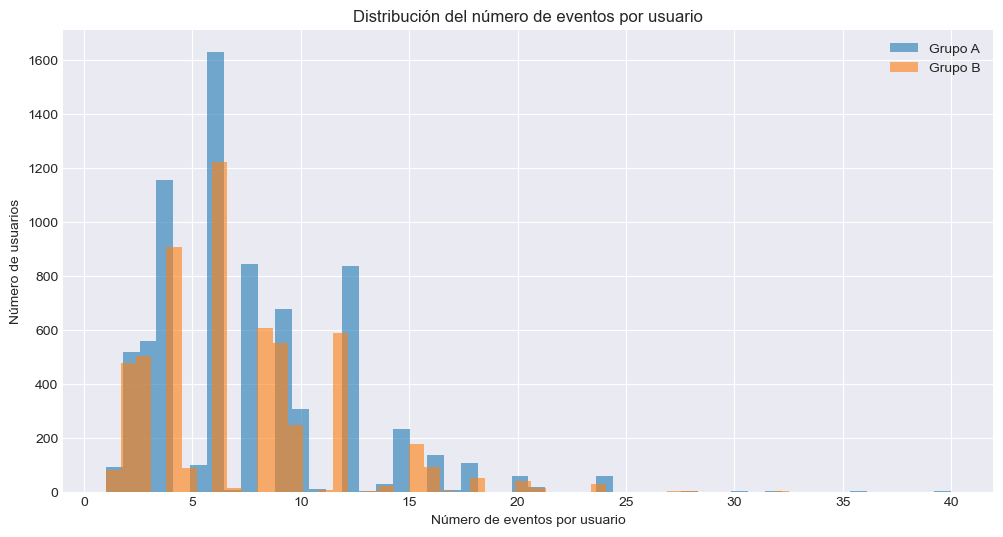

In [57]:
plt.figure(figsize=(12, 6))
for group in ['A', 'B']:
    subset = events_per_user[events_per_user['group'] == group]
    plt.hist(subset['event_count'], bins=50, alpha=0.6, label=f'Grupo {group}')

plt.xlabel('Número de eventos por usuario')
plt.ylabel('Número de usuarios')
plt.title('Distribución del número de eventos por usuario')
plt.legend()
plt.show()

Observaciones

La cantidad de eventos por usuario no está perfectamente equilibrada entre los grupos A y B. Si bien ambos grupos presentan una distribución similar, con una mayor concentración de usuarios que realizan una cantidad moderada de eventos, existen algunas diferencias notables:
Pico en el Grupo A: El Grupo A muestra un pico más pronunciado en la cantidad de usuarios que realizan entre 5 y 10 eventos. Esto sugiere que una proporción ligeramente mayor de usuarios en el Grupo A se encuentra en este rango. Por otro lado, el Grupo B presenta una cola más larga hacia la derecha, lo que indica que hay una mayor proporción de usuarios en este grupo que realizan una cantidad significativamente mayor de eventos. La presencia de usuarios extremos, es decir, aquellos que realizan una cantidad muy alta de eventos, podría efectivamente introducir ruido en el análisis.

# Análisis de resultados de la prueba A/B

-Analizar la conversión en las etapas del embudo para los grupos A y B

*Obtener el conjunto de usuarios únicos por etapa y grupo

In [58]:
product_page_users = events_with_group[events_with_group['event_name'] == 'product_page'].groupby('group')['user_id'].nunique()
product_cart_users = events_with_group[events_with_group['event_name'] == 'product_cart'].groupby('group')['user_id'].nunique()
purchase_users = events_with_group[events_with_group['event_name'] == 'purchase'].groupby('group')['user_id'].nunique()

In [59]:
funnel = pd.DataFrame({
    'product_page': product_page_users,
    'product_cart': product_cart_users,
    'purchase': purchase_users
})

In [60]:
funnel['cart_conversion'] = funnel['product_cart'] / funnel['product_page']
funnel['purchase_conversion'] = funnel['purchase'] / funnel['product_cart']

In [61]:
print(funnel)

       product_page  product_cart  purchase  cart_conversion  \
group                                                          
A              4937          2357      2555         0.477415   
B              3715          1911      1881         0.514401   

       purchase_conversion  
group                       
A                 1.084005  
B                 0.984301  


-Visualización del embudo de conversión

In [62]:
labels = ['Product Page', 'Product Cart', 'Purchase']
x = np.arange(len(labels))

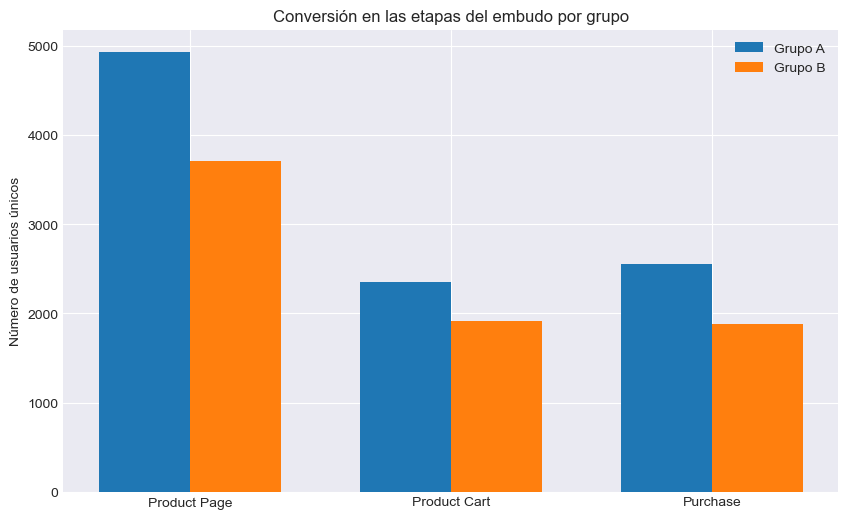

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
ax.bar(x - bar_width/2, funnel.loc['A', ['product_page', 'product_cart', 'purchase']], width=bar_width, label='Grupo A')
ax.bar(x + bar_width/2, funnel.loc['B', ['product_page', 'product_cart', 'purchase']], width=bar_width, label='Grupo B')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Número de usuarios únicos')
ax.set_title('Conversión en las etapas del embudo por grupo')
ax.legend()

plt.show()

-Comparación de tasas de conversión

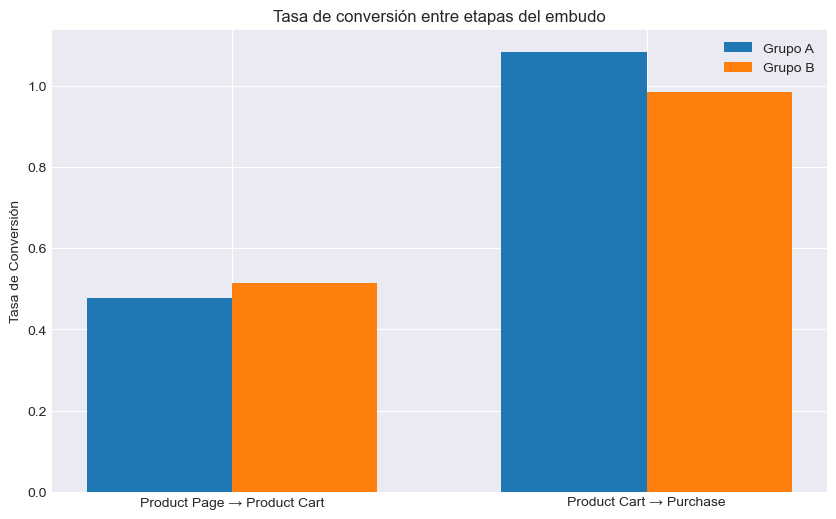

In [64]:
plt.figure(figsize=(10, 6))
x_labels = ['Product Page → Product Cart', 'Product Cart → Purchase']
conversion_rates_A = [funnel.loc['A', 'cart_conversion'], funnel.loc['A', 'purchase_conversion']]
conversion_rates_B = [funnel.loc['B', 'cart_conversion'], funnel.loc['B', 'purchase_conversion']]
x = np.arange(len(x_labels))
bar_width = 0.35

plt.bar(x - bar_width/2, conversion_rates_A, width=bar_width, label='Grupo A')
plt.bar(x + bar_width/2, conversion_rates_B, width=bar_width, label='Grupo B')
plt.xticks(x, x_labels)
plt.ylabel('Tasa de Conversión')
plt.title('Tasa de conversión entre etapas del embudo')
plt.legend()

plt.show()

-Observaciones

Usuarios por etapa                                                                                                                                      
Grupo A:                                                                                                                                                
Product Page: 4,937 usuarios visitaron la página del producto.                                                                                          
Product Cart: 2,357 usuarios añadieron un producto al carrito (47.7% de los que visitaron la página).                                                   
Purchase: 2,555 usuarios realizaron una compra.                                                                                                         
Grupo B:                                                                                                                                                
Product Page: 3,715 usuarios visitaron la página del producto.                                                                                          
Product Cart: 1,911 usuarios añadieron un producto al carrito (51.4% de los que visitaron la página).                                                   
Purchase: 1,881 usuarios realizaron una compra.                                                                                                         

Conversión entre etapas                                                                                                                                 
De product_page a product_cart (cart_conversion):                                                                                                       
Grupo A: El 47.7% de los usuarios que visitaron la página del producto añadieron un artículo al carrito.                                                
Grupo B: El 51.4% de los usuarios que visitaron la página del producto añadieron un artículo al carrito.                                                
El grupo B tiene una tasa de conversión ligeramente superior (51.4% vs. 47.7%), lo que podría indicar que el nuevo sistema de recomendaciones está ayudando a más usuarios a avanzar en el embudo en esta etapa.                                                                                           

De product_cart a purchase (purchase_conversion):                                                                                                       
Grupo A: La tasa de conversión es 1.084 (108.4%), lo que es anómalo. Esto significa que hay más compras que usuarios que llegaron a la etapa del carrito. Esto podría deberse a usuarios que realizan múltiples compras después de añadir productos al carrito.                                          
Grupo B: La tasa de conversión es 0.984 (98.4%), lo que sugiere que hay ligeramente menos compras que usuarios que llegaron al carrito. Esto podría reflejar que el grupo B realiza menos compras múltiples.                                                                                                

Rendimiento del embudo 

El grupo B tiene un rendimiento ligeramente mejor en la primera etapa del embudo (product_page → product_cart), con un aumento en la tasa de conversión de 3.7 puntos porcentuales (51.4% vs. 47.7%). Sin embargo, en la etapa final del embudo (product_cart → purchase), el grupo A tiene un comportamiento inusual (tasa superior al 100%), mientras que el grupo B tiene una conversión más estándar.                                                            

Usuarios en cada etapa

Hay menos usuarios en el grupo B en cada etapa (3,715 vs. 4,937 en product_page), lo que podría ser una fuente de sesgo si el tamaño muestral no fue balanceado. La conversión global (desde product_page hasta purchase) no muestra mejoras significativas para el grupo B en comparación con el grupo A.

Anomalía en la conversión de purchase del grupo A

La tasa de conversión mayor al 100% en el grupo A sugiere que algunos usuarios realizaron múltiples compras después de añadir productos al carrito.
Esto debería ser investigado más a fondo para confirmar si es un error en los datos o un comportamiento típico del grupo A.


-Prueba Z

Definir hipótesis:

Hipótesis nula (H₀): No hay diferencia significativa entre las proporciones de los grupos A y B.

Hipótesis alternativa (H₁): Hay una diferencia significativa entre las proporciones de los grupos A y B.

In [65]:
data = {
    "product_page": {"A": 4937, "B": 3715},  # Total de usuarios que visitaron la página del producto
    "product_cart": {"A": 2357, "B": 1911},  # Total de usuarios que agregaron productos al carrito
    "purchase": {"A": 2555, "B": 1881},      # Total de usuarios que realizaron una compra
}

In [66]:
n_A = 4937  
n_B = 3715 

In [67]:
results = {}

In [68]:
for stage, counts in data.items():
    # Proporciones de conversión
    p_A = counts["A"] / n_A
    p_B = counts["B"] / n_B

    # Proporción combinada
    P = (counts["A"] + counts["B"]) / (n_A + n_B)

    # Estadístico Z
    Z = (p_A - p_B) / np.sqrt(P * (1 - P) * (1 / n_A + 1 / n_B))

    # P-valor (doble cola)
    p_value = 2 * (1 - norm.cdf(abs(Z)))

    # Incremento esperado (10%)
    increment_needed = p_A * 0.10

    # Guardar resultados
    results[stage] = {
        "p_A": p_A,
        "p_B": p_B,
        "Z": Z,
        "p_value": p_value,
        "increment_needed": increment_needed,
        "meets_increment": (p_B - p_A) >= increment_needed,
    }


C:\Users\AIMEE DGUEZ NIETO\AppData\Local\Temp\ipykernel_24052\1418768130.py:10: RuntimeWarning: invalid value encountered in scalar divide
  Z = (p_A - p_B) / np.sqrt(P * (1 - P) * (1 / n_A + 1 / n_B))


In [69]:
for stage, metrics in results.items():
    print(f"Etapa: {stage}")
    print(f"  Conversión Grupo A: {metrics['p_A']:.2%}")
    print(f"  Conversión Grupo B: {metrics['p_B']:.2%}")
    print(f"  Estadístico Z: {metrics['Z']:.2f}")
    print(f"  P-valor: {metrics['p_value']:.4f}")
    print(f"  Incremento esperado (10%): {metrics['increment_needed']:.2%}")
    print(f"  ¿Se alcanzó el incremento esperado?: {metrics['meets_increment']}")
    print("---")

Etapa: product_page
  Conversión Grupo A: 100.00%
  Conversión Grupo B: 100.00%
  Estadístico Z: nan
  P-valor: nan
  Incremento esperado (10%): 10.00%
  ¿Se alcanzó el incremento esperado?: False
---
Etapa: product_cart
  Conversión Grupo A: 47.74%
  Conversión Grupo B: 51.44%
  Estadístico Z: -3.41
  P-valor: 0.0007
  Incremento esperado (10%): 4.77%
  ¿Se alcanzó el incremento esperado?: False
---
Etapa: purchase
  Conversión Grupo A: 51.75%
  Conversión Grupo B: 50.63%
  Estadístico Z: 1.03
  P-valor: 0.3024
  Incremento esperado (10%): 5.18%
  ¿Se alcanzó el incremento esperado?: False
---


Etapa: product_page

Conversión Grupo A y Grupo B: Ambas son del 100%, lo que significa que todos los usuarios que ingresaron al grupo A o B visitaron al menos una página del producto.
Estadístico Z y p-valor: Ambas métricas resultan en NaN, probablemente debido a que no hay variación entre los grupos (las conversiones son iguales y perfectas). Esto indica que no hay suficiente información para realizar una comparación estadística en esta etapa.
Incremento esperado: Aunque el incremento esperado del 10% es calculado (10%), no se alcanzó porque no existe diferencia entre los grupos.
Conclusión: No se pueden extraer diferencias significativas entre los grupos en esta etapa porque todos los usuarios accedieron a la página del producto.

Etapa: product_cart
Conversión Grupo A: 47.74%, es decir, casi la mitad de los usuarios del grupo A agregaron un producto al carrito.
Conversión Grupo B: 51.44%, ligeramente superior al Grupo A, lo que muestra que más usuarios del grupo B llegaron a esta etapa del embudo.
Estadístico Z y p-valor:
El valor del estadístico Z es -3.41, lo que significa que la diferencia entre los grupos es estadísticamente significativa.
El p-valor (0.0007) es mucho menor que 0.05, lo que refuerza que la diferencia observada no es debida al azar.
Incremento esperado: El incremento esperado del 10% sobre la conversión del grupo A (4.77%) no se alcanzó, ya que la diferencia observada entre B y A fue menor.
Conclusión: Aunque la diferencia en la conversión hacia product_cart entre los grupos es estadísticamente significativa, no se logró alcanzar el incremento esperado del 10%. Esto sugiere que el nuevo sistema de recomendaciones tuvo un impacto positivo, pero no lo suficientemente fuerte como para alcanzar los objetivos esperados.

Etapa: purchase
Conversión Grupo A: 51.75%, es decir, más de la mitad de los usuarios en el grupo A realizaron una compra.
Conversión Grupo B: 50.63%, ligeramente inferior al Grupo A, lo que sugiere que el nuevo sistema no ayudó a mejorar la conversión en esta etapa final del embudo.
Estadístico Z y p-valor:
El valor del estadístico Z es 1.03, lo que indica que la diferencia no es significativa.
El p-valor (0.3024) es mayor que 0.05, lo que significa que no hay evidencia estadística para concluir que los grupos difieran en esta etapa.
Incremento esperado: El incremento esperado del 10% sobre la conversión del grupo A (5.18%) no se alcanzó. De hecho, la conversión del grupo B fue menor que la del grupo A.
Conclusión: En esta etapa final del embudo, el nuevo sistema no solo no logró un incremento del 10% esperado, sino que el grupo B mostró un rendimiento ligeramente inferior al grupo A. Esto sugiere que el sistema de recomendaciones no mejoró las conversiones en compras.

# Conclusiones y recomendaciones

**Conclusiones**

El análisis de la prueba A/B para el sistema de recomendaciones mostró los siguientes hallazgos clave:

**Tasa de Conversión por Etapa:**

En la etapa inicial (product_page), la conversión fue del 100% para ambos grupos, sin diferencias entre ellos. Esto sugiere que todos los usuarios llegaron a la página del producto independientemente del sistema de recomendaciones.
En la etapa intermedia (product_cart), el grupo B mostró una mejora estadísticamente significativa respecto al grupo A (51.44% vs. 47.74%, con un p-valor de 0.0007). Sin embargo, esta mejora no alcanzó el incremento esperado del 10%.
En la etapa final (purchase), el grupo B tuvo una conversión menor que el grupo A (50.63% vs. 51.75%), y la diferencia no fue estadísticamente significativa (p-valor = 0.3024). Esto indica que el sistema de recomendaciones no logró impactar positivamente las compras, la métrica principal de éxito.

**Objetivos No Alcanzados:**

Ninguna de las etapas del embudo alcanzó el incremento esperado del 10%.
En la etapa clave de purchase, el nuevo sistema no solo falló en mejorar las conversiones, sino que mostró un rendimiento inferior al grupo control.

**Resultados Estadísticos:**

Las mejoras observadas en la etapa de product_cart son significativas, pero su impacto no es suficiente para justificar el cambio en el sistema de recomendaciones.En la etapa final, donde se esperaban resultados más sólidos, no hubo evidencia de que el nuevo sistema ofreciera beneficios.

**Recomendaciones**

**1. Optimizar el Sistema de Recomendaciones:**

Revisar el Algoritmo de Recomendación: Analizar cómo se generan las recomendaciones actuales y ajustar los parámetros para hacerlas más relevantes. Es posible que el sistema esté mostrando productos no alineados con los intereses de los usuarios.
Fomentar el Descubrimiento de Productos: Implementar recomendaciones más personalizadas, como productos similares a los vistos recientemente o productos comprados con frecuencia por otros usuarios con intereses similares.

**2. Mejorar la Experiencia en la Etapa de Compra:**

Simplificar el Proceso de Pago: Evaluar la experiencia del usuario en el flujo de compra para identificar posibles fricciones (como demasiados pasos, opciones de pago limitadas o falta de claridad en los costos).
Ofrecer Incentivos: Considerar promociones como descuentos exclusivos, envío gratuito o cupones aplicables al finalizar la compra para aumentar la motivación de los usuarios en el grupo B.

**3. Analizar el Comportamiento de los Usuarios:**

Segmentación por Perfil: Evaluar cómo varían las conversiones por dispositivo, región o tiempo para identificar subgrupos donde el sistema de recomendaciones podría estar funcionando mejor o peor.
Evaluar Diferencias por Productos: Examinar si ciertos tipos de productos tienen mejor rendimiento bajo el nuevo sistema, y enfocar las mejoras en estos casos.

**4. Realizar Pruebas Adicionales:**

Prueba Iterativa A/B: Implementar pequeñas modificaciones en el sistema de recomendaciones y realizar nuevas pruebas A/B para medir su efectividad incremental.
Pruebas Multivariadas: Experimentar con diferentes formatos y ubicaciones de las recomendaciones en la página del producto y el carrito.

**5. Incorporar Feedback de los Usuarios:**

Encuestas cualitativas para entender si los usuarios encuentran útiles las recomendaciones ofrecidas.
Análisis de sesiones grabadas para identificar cómo interactúan los usuarios con el sistema de recomendaciones y si estas interacciones terminan en una compra.

Aunque el sistema de recomendaciones mostró un impacto positivo en la etapa intermedia del embudo (product_cart), no cumplió con los objetivos esperados ni mejoró las conversiones en la etapa final (purchase). Es crucial optimizar tanto la relevancia de las recomendaciones como la experiencia del usuario en el proceso de compra. Con ajustes estratégicos y pruebas iterativas, existe el potencial de lograr un impacto positivo y significativo en el futuro.

